# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Get the data

In [2]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
display(df.head())
df.info()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Data Cleaning

In [3]:
def col_names_std(df):
    import pandas as pd
    import numpy as np
    df.columns = [df.columns[i].lower().replace(' ','_') for i in range(len(df.columns))]
    return df

df=col_names_std(df)

import datetime
from datetime import date

df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

# EDA

## Numerical features

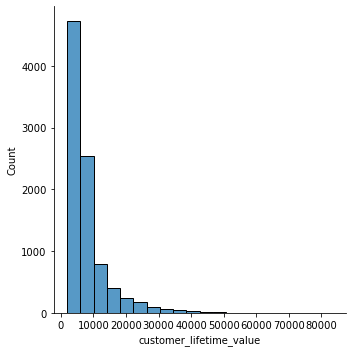

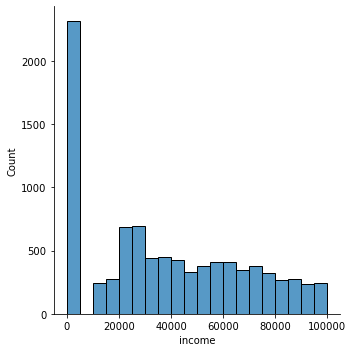

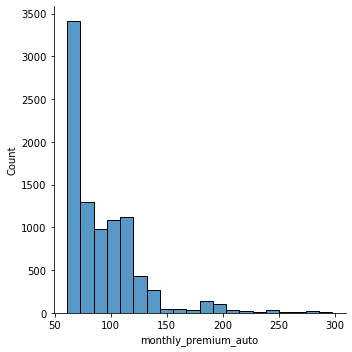

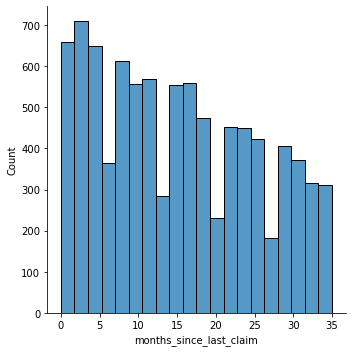

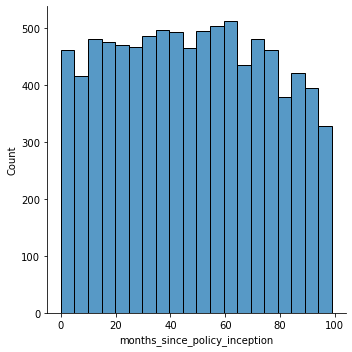

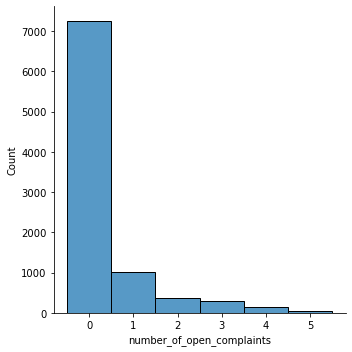

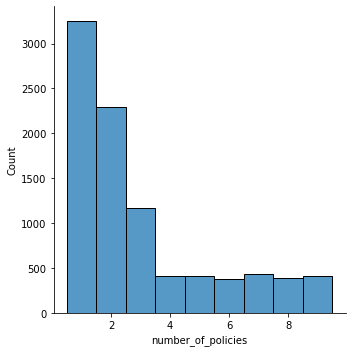

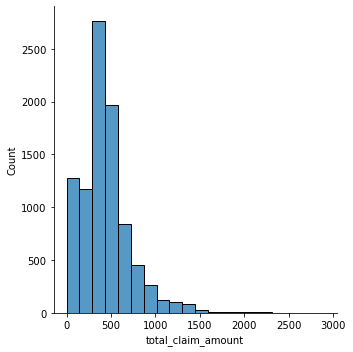

In [4]:
numerical=df.select_dtypes(include='number')#.apply(lambda x: round(x,2)) # a lambda just to round it pretty
#NOTE: I am excluding the boolean response
#display(numerical)

continuous=['customer_lifetime_value', 'income', 'monthly_premium_auto', 
            'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
discrete=['number_of_open_complaints', 'number_of_policies']

for column in numerical.columns:
    if column in continuous:
        sns.displot(numerical, x=column, bins=20)
    else:
        sns.displot(numerical, x=column, discrete=True)

### Correlation matrices

In [5]:
corr_mat = df.corr(method='spearman')
corr_mat

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.055395   
income                                        0.055395  1.000000   
monthly_premium_auto                          0.453933 -0.017608   
months_since_last_claim                       0.005126 -0.025784   
months_since_policy_inception                -0.002429 -0.001945   
number_of_open_complaints                    -0.031312  0.006334   
number_of_policies                            0.488860 -0.010273   
total_claim_amount                            0.210598 -0.401598   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.453933                 0.005126   
income                                    -0.017608                -0.025784   
monthly_premium_auto                       1.000000                -0.005989   
months_since_last_claim                   -0.005989                 1.000000   
months_since_policy_inception              0.014596                -0.048269   
number_of_open_complaints                 -0.012751                 0.005736   
number_of_policies                        -0.006936                 0.011439   
total_claim_amount                         0.522261                -0.000782   

                               months_since_policy_inception  \
customer_lifetime_value                            -0.002429   
income                                             -0.001945   
monthly_premium_auto                                0.014596   
months_since_last_claim                            -0.048269   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.013233   
number_of_policies                                 -0.009546   
total_claim_amount                                 -0.006569   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.031312            0.488860   
income                                          0.006334           -0.010273   
monthly_premium_auto                           -0.012751           -0.006936   
months_since_last_claim                         0.005736            0.011439   
months_since_policy_inception                  -0.013233           -0.009546   
number_of_open_complaints                       1.000000            0.001523   
number_of_policies                              0.001523            1.000000   
total_claim_amount                             -0.024694           -0.011100   

                               total_claim_amount  
customer_lifetime_value                  0.210598  
income                                  -0.401598  
monthly_premium_auto                     0.522261  
months_since_last_claim                 -0.000782  
months_since_policy_inception           -0.006569  
number_of_open_complaints               -0.024694  
number_of_policies                      -0.011100  
total_claim_amount                       1.000000

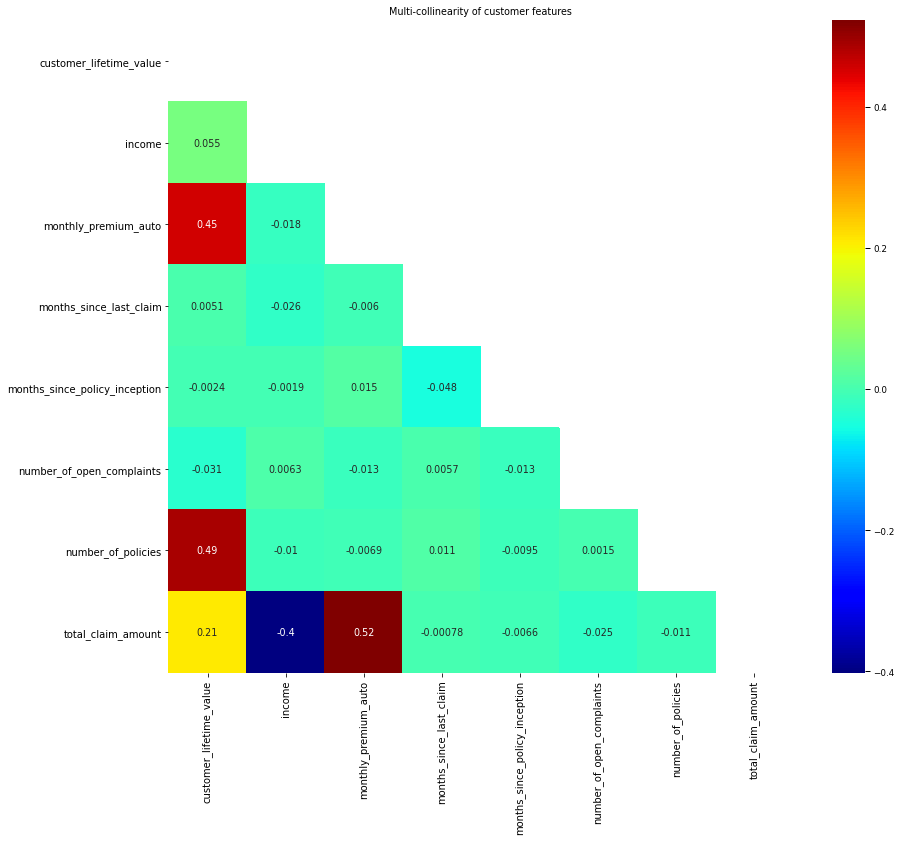

In [6]:
# Plot a correlation matrix to locate possible correlation right away

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True # Mask to hide the repeated half of the matrix

fig, ax = plt.subplots(figsize=(14, 12)) # this will set the width and height of the plot
sns.set_context('paper') #This affects things like the size of the labels, lines, and other elements of the plot
ax = sns.heatmap(corr_mat, mask=mask, annot=True, cmap='jet') # Heatmap declaration
ax.set_title('Multi-collinearity of customer features') #Title for the graph
plt.show()

## Categorical features

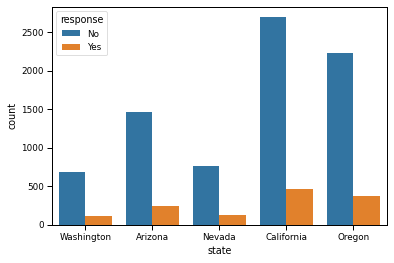

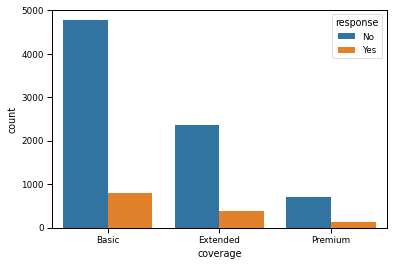

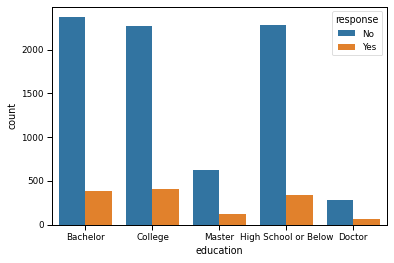

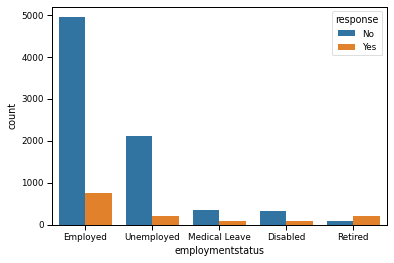

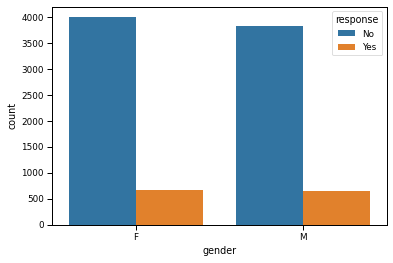

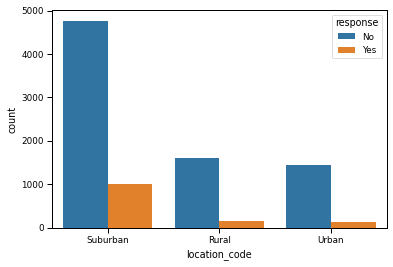

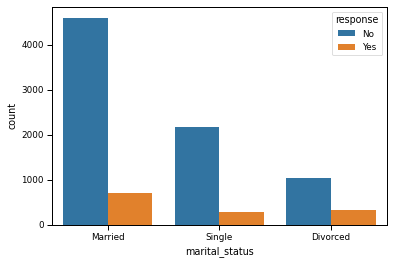

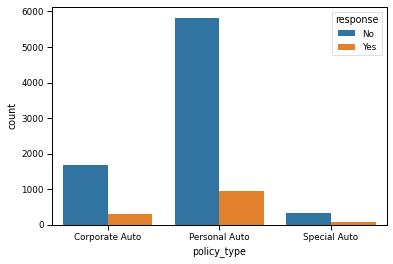

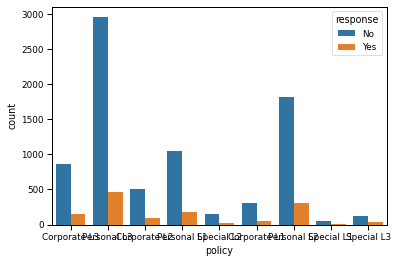

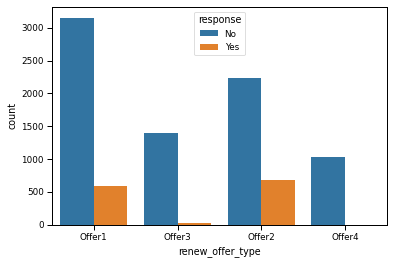

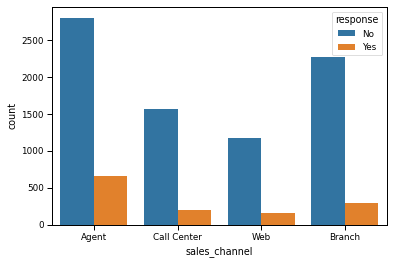

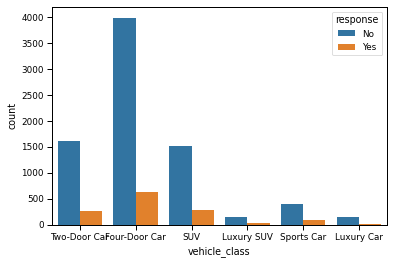

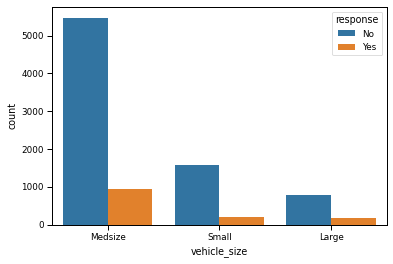

In [7]:
categoricals=df.select_dtypes(include=['object', 'datetime64']).drop(['customer','effective_to_date','response'], axis=1)
#NOTE: I am excluding the datetime objects

for col in categoricals.columns:
    sns.countplot(x=df[col], hue=df['response'])
    plt.show()

# Feature Engineering

## Normalization - BoxCox Transformation

In [8]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols} #it will first generate this dictionary
    for column in numeric_cols:
        #In this case, I need the confidence interval data
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) #boxcox does not work with negatives
        df[column] = df[column].fillna(df[column].mean()) #I fill the nan's with the mean
        transformed_data, ci = stats.boxcox(df[column]) 
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [9]:
df_for_BCTrans = df.copy() #It is important to do it this way with the .copy method.

df_trans, _ci = boxcox_transform(df_for_BCTrans)

## Remove Outliers

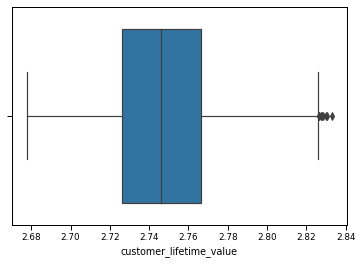

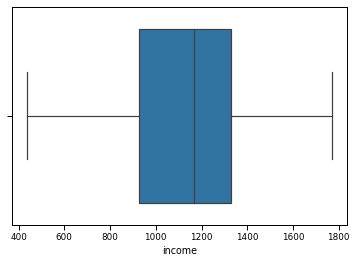

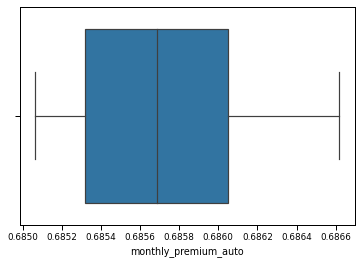

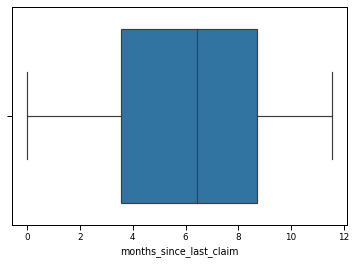

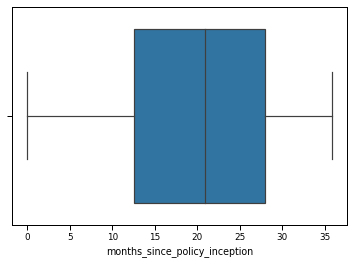

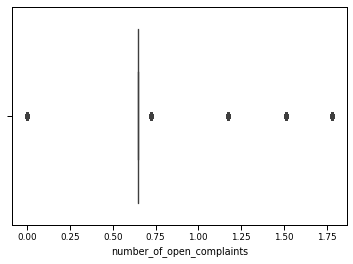

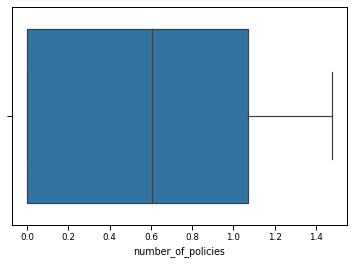

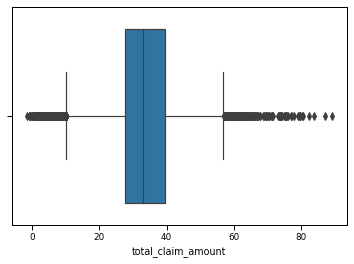

(9134, 24)

In [10]:
for col in df_trans.select_dtypes(include = np.number):
    sns.boxplot(x=df_trans[col])#, whis=10) # whis is the parameter to choose your threshold, standard is 1.5
    plt.show()
    
df_trans.shape

In [11]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

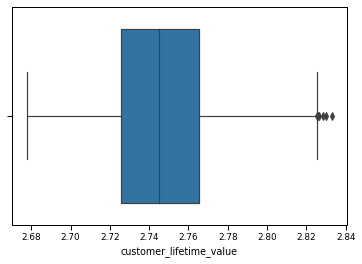

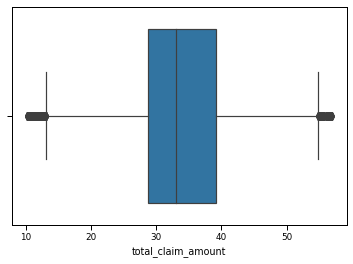

(8534, 24)

In [12]:
df_trans_outliers = df_trans.copy()

df_trans_outliers = remove_outliers(df_trans_outliers, threshold=1.5, in_columns=['total_claim_amount']) # we don't want to reduce our data too much,
## but we can play with the parameters to see,
## so after a better analysis we can choose which columns to drop outliers or not
sns.boxplot(x=df_trans_outliers['customer_lifetime_value'])
plt.show()
sns.boxplot(x=df_trans_outliers['total_claim_amount'])
plt.show()
df_trans_outliers.shape

In [13]:
df=df_trans_outliers

## X/y split

In [14]:
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)

X_num = X.select_dtypes(include = np.number)#np.number includes int and float
X_cat = X.select_dtypes(include = np.object).drop(['customer'], axis=1)

<ipython-input-14-0f2dcb1baa20>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(include = np.object).drop(['customer'], axis=1)


## Encoding categorical values

In [15]:
# One Hot Encoding categorical variables
encoder = OneHotEncoder(handle_unknown='error', drop='first') #drop one column for efficiency. It can be deduced
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [16]:
# Concat DataFrames

column_names = list(X_num.columns) # get list of numerical column names
column_names.extend(list(encoder.get_feature_names())) # add list of dummified categorical column names

X_numcat = np.concatenate([X_num, X_cat_encoded], axis=1)
X_ready = pd.DataFrame(data=X_numcat, index=X.index, columns=column_names)
X_ready.sample(5)

customer_lifetime_value       income  monthly_premium_auto  \
462                  2.689325  1167.961720              0.685316   
501                  2.754318  1167.961720              0.685251   
3088                 2.744436   877.484118              0.685406   
648                  2.781266  1144.589895              0.686078   
3909                 2.792702  1556.518164              0.686529   

      months_since_last_claim  months_since_policy_inception  \
462                  1.526503                       2.367325   
501                  0.849804                      29.124329   
3088                 3.981540                      13.322401   
648                  0.000000                       2.367325   
3909                 2.634511                      23.379802   

      number_of_open_complaints  number_of_policies  x0_California  x0_Nevada  \
462                    0.648045            0.000000            0.0        1.0   
501                    0.648045            0.607328            1.0        0.0   
3088                   0.648045            0.893486            1.0        0.0   
648                    0.000000            0.607328            0.0        0.0   
3909                   0.648045            1.070748            1.0        0.0   

      x0_Oregon  ...  x11_Branch  x11_Call Center  x11_Web  x12_Luxury Car  \
462         0.0  ...         0.0              0.0      1.0             0.0   
501         0.0  ...         1.0              0.0      0.0             0.0   
3088        0.0  ...         1.0              0.0      0.0             0.0   
648         1.0  ...         1.0              0.0      0.0             0.0   
3909        0.0  ...         1.0              0.0      0.0             0.0   

      x12_Luxury SUV  x12_SUV  x12_Sports Car  x12_Two-Door Car  x13_Medsize  \
462              0.0      0.0             0.0               0.0          1.0   
501              0.0      0.0             0.0               0.0          0.0   
3088             0.0      0.0             0.0               0.0          0.0   
648              0.0      0.0             0.0               0.0          1.0   
3909             1.0      0.0             0.0               0.0          1.0   

      x13_Small  
462         0.0  
501         1.0  
3088        1.0  
648         0.0  
3909        0.0  

[5 rows x 50 columns]

## Train-test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=0.3, random_state=42)

## Model fitting

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model evaluation

In [19]:
predictions_norm = model.predict(X_test)
R2 = r2_score(y_test, predictions_norm)

from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions_norm, _ci['total_claim_amount'])

MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions, squared=True)
RMSE = mean_squared_error(y_test, predictions, squared=False)

In [20]:
print('R2 =',R2, 'MAE =', MAE, 'MSE =', MSE, 'RMSE =', RMSE)

R2 = 0.8295799539292135 MAE = 387.8211089650025 MSE = 183016.9317741342 RMSE = 427.8047823179799


In [23]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results=results.sort_values('resid', ascending=False)

true        pred       resid
2035  1101.054320  481.364332  619.689988
2008  1138.255325  592.516345  545.738980
6813  1106.913309  572.181067  534.732242
7437  1134.960471  637.186971  497.773500
7102  1123.212014  629.259694  493.952320
...           ...         ...         ...
4935   333.696228  333.849255    0.153027
3044   457.593764  457.727880    0.134116
4485   459.785009  459.832529    0.047520
5342   558.835255  558.881125    0.045870
48     529.624084  529.625866    0.001782

[2561 rows x 3 columns]

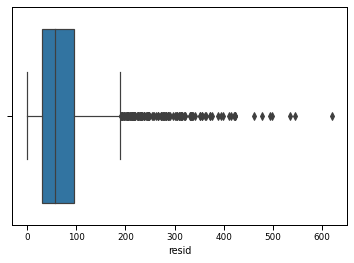

In [25]:
display(results)
sns.boxplot(x=results['resid'])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

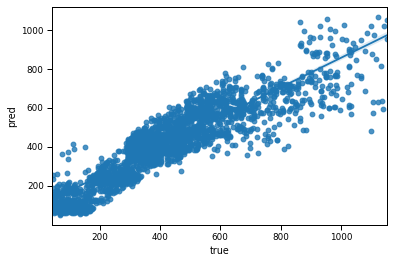

In [42]:
sns.regplot(results['true'], results['pred'])

# Improving the model

## Check multicollinearity with VIF

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature           VIF
0         customer_lifetime_value  15025.511098
1                          income     25.092253
2            monthly_premium_auto  14853.767023
4   months_since_policy_inception      5.484248
5       number_of_open_complaints      6.231231
18                    x4_Employed     18.637743
21                  x4_Unemployed      8.154130
23                    x6_Suburban      6.048135
25                     x7_Married      5.163262
48                    x13_Medsize      7.982537

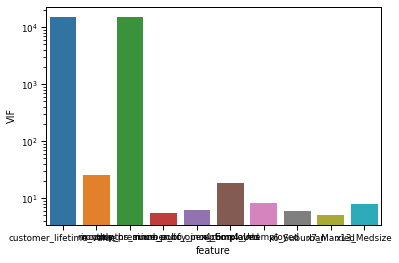

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_ready=pd.concat([y,X_ready],axis=1)
#df_ready

#Independent variables set
ind_var=X_ready

#VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = ind_var.columns

#calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(ind_var.values, i) for i in range(len(ind_var.columns))]

vif_data['VIF'].replace([np.inf, -np.inf], np.nan, inplace=True)

vif_data_filtered=vif_data[vif_data['VIF']>5]
display(vif_data_filtered)

sns.barplot(x=vif_data_filtered['feature'], y=vif_data_filtered['VIF']).set_yscale("log")
plt.show()

Decided to drop the two features with extremely high multicollinearity values: customer_lifetime_value and monthly_premium_auto. Then, try fitting the model again.

## Second model fitting

In [36]:
X_ready_2=X_ready.drop(['customer_lifetime_value', 'monthly_premium_auto'], axis=1)

In [37]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_ready_2, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train_2, y_train_2)

LinearRegression()

In [38]:
predictions_norm_2 = model.predict(X_test_2)
R2_2 = r2_score(y_test_2, predictions_norm_2)

from scipy.special import inv_boxcox

predictions_2 = inv_boxcox(predictions_norm_2, _ci['total_claim_amount'])

MAE_2 = mean_absolute_error(y_test_2, predictions_2)
MSE_2 = mean_squared_error(y_test_2, predictions_2, squared=True)
RMSE_2 = mean_squared_error(y_test_2, predictions_2, squared=False)

In [41]:
dict_ = {'parameter':['R2','MAE','MSE','RMSE'],'model_1': [R2,MAE,MSE,RMSE], 'model_2': [R2_2,MAE_2,MSE_2,RMSE_2]}
evaluation = pd.DataFrame(data=dict_)
evaluation

parameter        model_1        model_2
0        R2       0.829580       0.821790
1       MAE     387.821109     387.381171
2       MSE  183016.931774  182939.373939
3      RMSE     427.804782     427.714126

Eliminating those features with high multicolinearity did not have any significant effect on the metrics of the model.

true        pred       resid
2035  1101.054320  459.675191  641.379129
2008  1138.255325  567.576555  570.678770
6813  1106.913309  582.401509  524.511800
5365  1107.145019  601.173238  505.971781
7102  1123.212014  623.197801  500.014213
...           ...         ...         ...
8813    99.509191   99.692707    0.183516
4241   283.849464  283.744067    0.105397
3330   355.200000  355.288389    0.088389
580    238.005074  237.931855    0.073219
6881   555.457674  555.444881    0.012793

[2561 rows x 3 columns]

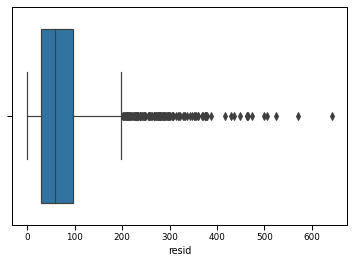

In [40]:
results_2 = pd.DataFrame()
results_2['true'] = inv_boxcox(y_test_2, _ci['total_claim_amount'])
results_2['pred'] = predictions_2
results_2['resid'] = results_2.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results_2=results_2.sort_values('resid', ascending=False)

display(results_2)
sns.boxplot(x=results_2['resid'])
plt.show()